<a href="https://colab.research.google.com/github/Evely90/Co2-Emissions/blob/main/Biggest_strides_CO2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Biggest strides in decreasing CO₂ output

In this notebook, the following question will be analyzed:

**Which countries are making the biggest strides in decreasing CO₂ output?**



First, let's narrow down the question. Over what period of time would it be relevant to know what countries making the biggest strides?
At the UN Climate Change Conference (COP21) in Paris in december 2015, world leaders set an agreement (The Paris Agreement) to reduce global greenhouse gas emissions ([United Nations](https://www.un.org/en/climatechange/paris-agreement)). So it would be relevant to look from 2016 until now which countries are reducing CO₂ the most.

Also, this question can be approached in multiple ways:
1. Per capita percentage change in CO₂ emissions: The percentage change in CO₂ emissions per capita over a period of time. This approach accounts for population size and makes it easier to compare countries with each other.
2. Percentage change in CO₂ emissions: The percentage change in total CO₂ emissions for each country over a period of time can be calculated. This identifies countries that are making the biggest relative improvements in CO₂ output, regardless of population size or country size.

Both approaches will be used to compare the outcomes and answer the question.

To answer the question using the first approach, a dataset is used that has the annual CO₂ emissions per capita of a country over different years in tonnes (Global Carbon Budget (2023) via [Our World in Data](https://ourworldindata.org/grapher/co-emissions-per-capita)).

To answer the question using the second approach, a dataset is used that has the annual total CO₂ emissions per country over different years in tonnes (Global Carbon Budget (2023) via [Our World in Data](https://ourworldindata.org/grapher/annual-co2-emissions-per-country)).

In [ ]:
# Importing modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

## Per capita percentage change
The percentage change in CO₂ emissions per capita over a period of time. This approach accounts for population size of a country.

In [ ]:
# Import dataframe of CO2 emissions per capita
df_capita = pd.read_csv('https://raw.githubusercontent.com/Evely90/Co2-Emissions/main/co-emissions-per-capita.csv')

In [ ]:
# Drop unneccessary column
df_capita = df_capita.drop(columns='Code')

# Rename column
df_capita = df_capita.rename(columns={"Entity": "Country", "Annual CO₂ emissions (per capita)": "CO2 Emissions"})

# Dropping rows that aren't countries
drop_countries = ~df_capita['Country'].isin(['Africa', 'Asia', 'Asia (excl. China and India)', 'Europe', 'Europe (excl. EU-27)',
                             'Europe (excl. EU-28)', 'European Union (27)', 'European Union (28)',
                             'High-income countries', 'Low-income countries', 'Lower-middle-income countries',
                             'North America', 'North America (excl. USA)', 'Oceania', 'South America',
                              'Upper-middle-income countries', 'World'])
df_capita = df_capita[drop_countries]
df_capita

,Country,Year,CO2 Emissions
0,Afghanistan,1949,0.001992
1,Afghanistan,1950,0.011266
2,Afghanistan,1951,0.012098
3,Afghanistan,1952,0.011946
4,Afghanistan,1953,0.013685
...,...,...,...
26595,Zimbabwe,2018,0.711830
26596,Zimbabwe,2019,0.636645
26597,Zimbabwe,2020,0.500945
26598,Zimbabwe,2021,0.524972


### Graph 1: Percentage difference between 2016 and 2022 per capita
For this graph, the amount of CO₂ emission per capita for each country in 2022 has been compared to the amount of CO₂ emission per capita for each country in 2016. The percentage change has been calculated. The graph shows the top 10 countries that have had the biggest decrease in CO₂ emissions in 2022 since 2016.

In [ ]:
# Creating a new df that has for each country the % difference per capita between 2016 and 2022

# Filter data of years 2016 and 2022
df_difference = df_capita[df_capita['Year'].isin([2016, 2022])]

# Pivot the dataframe
df_pivot = df_difference.pivot(index='Country', columns='Year', values='CO2 Emissions')

# Calculate % difference between 2016 and 2022 and put it in a new column
df_pivot['Difference (%)'] = ((df_pivot[2022] - df_pivot[2016]) / df_pivot[2016]) * 100

# Reset the index
df_pivot.reset_index(inplace=True)
df_pivot.columns.name = None

df_pivot

,Country,2016,2022,Difference (%)
0,Afghanistan,0.261795,0.295364,12.822404
1,Albania,1.607732,1.743200,8.426056
2,Algeria,3.928713,3.927226,-0.037837
3,Andorra,6.463239,4.617124,-28.563313
4,Angola,0.822944,0.451552,-45.129694
...,...,...,...,...
209,Vietnam,2.396781,3.499517,46.009035
210,Wallis and Futuna,2.122125,2.281908,7.529383
211,Yemen,0.341850,0.337017,-1.413701
212,Zambia,0.349736,0.445701,27.439315


In [ ]:
# Sort the data to get the countries with the biggest CO2 reduction (so the most negative number) on top
top10_countries = df_pivot.nsmallest(10, 'Difference (%)')

# Reversing the order to get the country with the biggest reduction on top of the graph
top10_countries = top10_countries.sort_values(by=['Difference (%)'], ascending=False)

# Convert negative numbers to positive to make the graph better
top10_countries['Difference (%)'] = top10_countries['Difference (%)'].abs()

top10_countries

,Country,2016,2022,Difference (%)
21,Bermuda,9.814804,6.937063,29.320415
85,Hong Kong,5.831929,4.081913,30.007495
201,Ukraine,5.218434,3.557853,31.821437
28,British Virgin Islands,7.755670,5.003958,35.480004
63,Estonia,13.290373,7.776280,41.489377
61,Equatorial Guinea,5.402845,3.030720,43.905106
4,Angola,0.822944,0.451552,45.129694
208,Venezuela,4.956996,2.716869,45.191229
113,Macao,2.841425,1.512768,46.760238
49,Curacao,36.264057,9.189007,74.660841


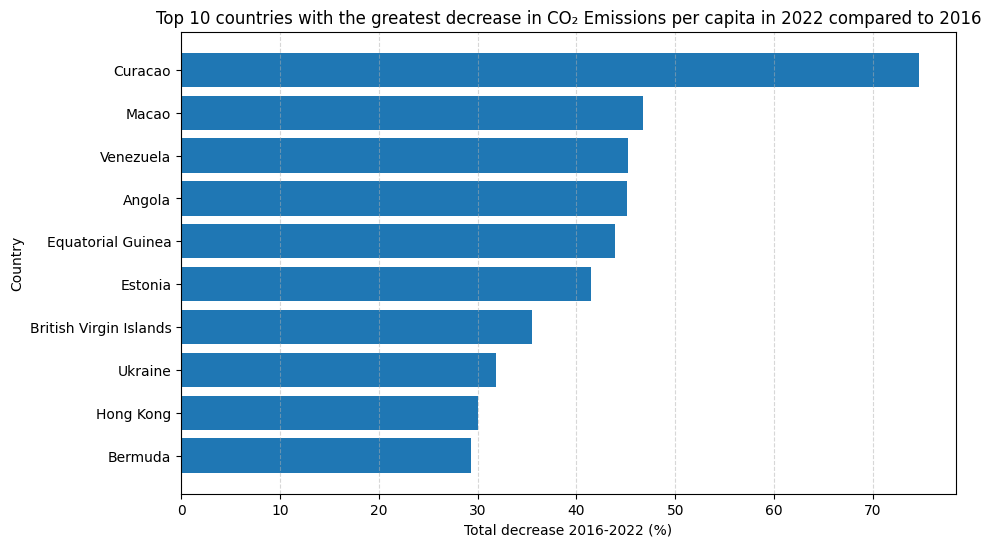

In [ ]:
# Create graph
fig, ax = plt.subplots(figsize=(10, 6))
plt.barh(top10_countries['Country'], top10_countries['Difference (%)'])
plt.xlabel('Total decrease 2016-2022 (%)')
plt.ylabel('Country')
plt.title('Top 10 countries with the greatest decrease in CO₂ Emissions per capita in 2022 compared to 2016')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.show()

The top 3 countries that decreased the CO₂ emission per head of capita the most in the year 2022 compared to 2016 are Curacao, Macao and Venezuela. In the top 10 are also Angola, Equatorial Guinea, Estonia, British Virgin Islands, Ukraine, Hong Kong and Bermuda.

### Graph 2: Average percentage change over the years 2016-2022 per capita
For this graph the CO₂ emissions per capita of each year for each country have been compared to the CO₂ emissions per capita of the year before. The percentage change has been displayed in a table. Then, the average yearly change in CO₂ emission per capita over the years 2016 until 2022 has been calculated. The graph shows the top 10 of countries where the average yearly decrease in CO₂ emission per capita over the years 2016-2022 was the highest.

In [ ]:
# Calculate the % change for each year compared to the previous year and put it in a new column
df_capita_avg = df_capita.copy()
df_capita_avg['CO2 Emissions % Change'] = df_capita_avg.groupby('Country')['CO2 Emissions'].pct_change() * 100
df_capita_avg

,Country,Year,CO2 Emissions,CO2 Emissions % Change
0,Afghanistan,1949,0.001992,NaN
1,Afghanistan,1950,0.011266,465.501188
2,Afghanistan,1951,0.012098,7.388157
3,Afghanistan,1952,0.011946,-1.251933
4,Afghanistan,1953,0.013685,14.550636
...,...,...,...,...
26595,Zimbabwe,2018,0.711830,12.959255
26596,Zimbabwe,2019,0.636645,-10.562236
26597,Zimbabwe,2020,0.500945,-21.314819
26598,Zimbabwe,2021,0.524972,4.796395


In [ ]:
# Filter df to keep only rows from 2015 and up
df_capita_avg = df_capita_avg[(df_capita_avg['Year'] >= 2016)]

# Display the filtered dataframe
df_capita_avg

,Country,Year,CO2 Emissions,CO2 Emissions % Change
67,Afghanistan,2016,0.261795,-9.749529
68,Afghanistan,2017,0.276853,5.751517
69,Afghanistan,2018,0.294876,6.510095
70,Afghanistan,2019,0.293401,-0.500041
71,Afghanistan,2020,0.305039,3.966587
...,...,...,...,...
26595,Zimbabwe,2018,0.711830,12.959255
26596,Zimbabwe,2019,0.636645,-10.562236
26597,Zimbabwe,2020,0.500945,-21.314819
26598,Zimbabwe,2021,0.524972,4.796395


In [ ]:
# Calculate the average CO2 emissions per capita % change for each country over years 2016-2022
df_capita_avg_change = df_capita_avg.groupby('Country')['CO2 Emissions % Change'].mean()

# Get the top 10 countries with the highest average CO2 emissions per capita % reduction
avg_top10 = df_capita_avg_change.nsmallest(10)

# Convert negative numbers to positive to make the chart better
avg_top10 = avg_top10.abs()
avg_top10

Country
Curacao                   18.195654
Angola                     9.612894
Montserrat                 8.370234
Venezuela                  8.232360
Macao                      7.619143
Equatorial Guinea          6.335904
Zimbabwe                   5.730431
British Virgin Islands     5.643233
Estonia                    4.567000
Cuba                       4.548865
Name: CO2 Emissions % Change, dtype: float64

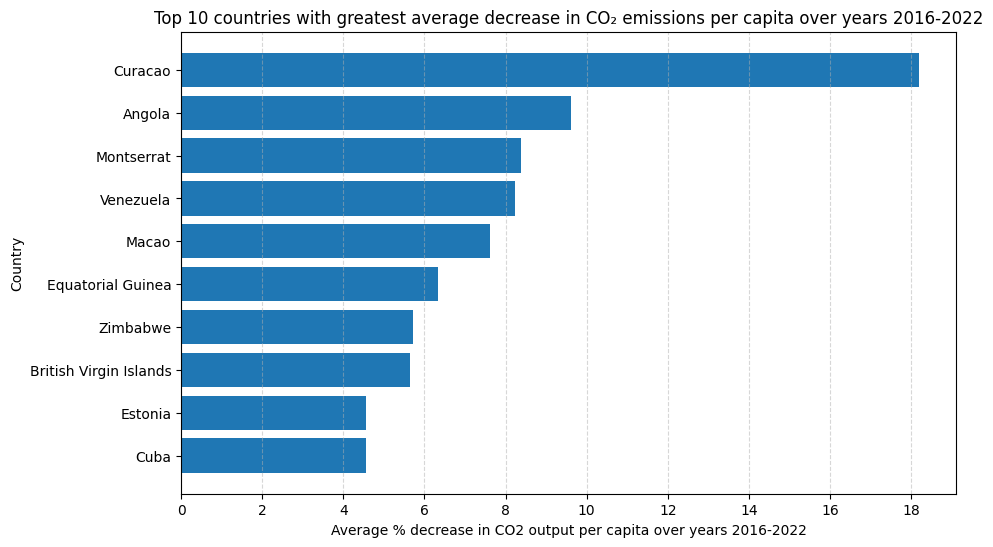

In [ ]:
# Reverse order
avg_top10 = avg_top10[::-1]

# Create graph
fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(avg_top10.index, avg_top10)
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=2))
plt.xlabel('Average % decrease in CO2 output per capita over years 2016-2022')
plt.ylabel('Country')
plt.title('Top 10 countries with greatest average decrease in CO₂ emissions per capita over years 2016-2022')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.show()

Despite fluctuations in yearly emissions, the top 3 countries that have consistently reduced their CO₂ emissions per capita on average when each year is compared to the previous year between the years 2016 and 2022, are Curacao, Angola and Montserrat.

## Total percentage change
The percentage change in total CO₂ emissions for each country over a period of time. Regardless of country and/or population size.

In [ ]:
# Import dataframe of total annual CO2 emissions
df_emissions = pd.read_csv('https://raw.githubusercontent.com/Evely90/Co2-Emissions/main/annual-co2-emissions-per-country.csv')
df_emissions

,Entity,Code,Year,Annual CO₂ emissions
0,Afghanistan,AFG,1949,14656.0
1,Afghanistan,AFG,1950,84272.0
2,Afghanistan,AFG,1951,91600.0
3,Afghanistan,AFG,1952,91600.0
4,Afghanistan,AFG,1953,106256.0
...,...,...,...,...
30303,Zimbabwe,ZWE,2018,10714598.0
30304,Zimbabwe,ZWE,2019,9775428.0
30305,Zimbabwe,ZWE,2020,7849639.0
30306,Zimbabwe,ZWE,2021,8396158.0


In [ ]:
# Drop unneccessary column
df_emissions = df_emissions.drop(columns='Code')

# Rename column
df_emissions = df_emissions.rename(columns={"Entity": "Country"})

# Dropping rows that aren't countries
drop_countries_emissions = ~df_emissions['Country'].isin(['Africa', 'Africa (GCP)', 'Antarctica', 'Asia', 'Asia (GCP)', 'Asia (excl. China and India)',
                                              'Central America (GCP)', 'Europe', 'Europe (GCP)', 'Europe (excl. EU-27)', 'Europe (excl. EU-28)',
                                              'European Union (27)', 'European Union (28)', 'High-income countries', 'International aviation',
                                              'International shipping', 'Kuwaiti Oil Fires (GCP)', 'Leeward Islands (GCP)', 'Low-income countries',
                                              'Lower-middle-income countries', 'Middle East (GCP)', 'Non-OECD (GCP)', 'North America', 'North America (GCP)',
                                              'North America (excl. USA)', 'OECD (GCP)', 'Oceania', 'Oceania (GCP)', 'Panama Canal Zone (GCP)',
                                              'Ryukyu Islands (GCP)', 'South America', 'South America (GCP)', 'St. Kitts-Nevis-Anguilla',
                                              'Upper-middle-income countries', 'World'])
df_emissions = df_emissions[drop_countries_emissions]

# Reset index
df_emissions = df_emissions.reset_index(drop=True)
df_emissions

,Country,Year,Annual CO₂ emissions
0,Afghanistan,1949,14656.0
1,Afghanistan,1950,84272.0
2,Afghanistan,1951,91600.0
3,Afghanistan,1952,91600.0
4,Afghanistan,1953,106256.0
...,...,...,...
23882,Zimbabwe,2018,10714598.0
23883,Zimbabwe,2019,9775428.0
23884,Zimbabwe,2020,7849639.0
23885,Zimbabwe,2021,8396158.0


### Graph 3: Percentage difference between 2016 and 2022

For this graph, the total amount CO₂ emissions for each country in 2022 has been compared to the amount of CO₂ emission for each country in 2016. The percentage change has been calculated. The graph shows the top 10 countries that have had the biggest relative decrease in CO₂ emissions in 2022 since 2016.

In [ ]:
# Creating a new df that has for each country the % difference between 2016 and 2022

# Filter data of years 2016 and 2022
df_emissions_diff = df_emissions[df_emissions['Year'].isin([2016, 2022])]

# Pivot the dataframe
df_emissions_diff_pivot = df_emissions_diff.pivot(index='Country', columns='Year', values='Annual CO₂ emissions')

# Calculate % difference between 2016 and 2022 and put it in a new column
df_emissions_diff_pivot['Difference (%)'] = ((df_emissions_diff_pivot[2022] - df_emissions_diff_pivot[2016]) / df_emissions_diff_pivot[2016]) * 100

# Reset the index
df_emissions_diff_pivot.reset_index(inplace=True)
df_emissions_diff_pivot.columns.name = None

df_emissions_diff_pivot

,Country,2016,2022,Difference (%)
0,Afghanistan,9067598.0,12147948.0,33.970959
1,Albania,4631979.0,4954730.0,6.967886
2,Algeria,158481630.0,176345140.0,11.271660
3,Andorra,468992.0,368645.0,-21.396314
4,Angola,23992706.0,16070269.0,-33.020190
...,...,...,...,...
209,Vietnam,223203940.0,343606620.0,53.942901
210,Wallis and Futuna,25648.0,26461.0,3.169838
211,Yemen,10007327.0,11356347.0,13.480323
212,Zambia,5864282.0,8921889.0,52.139495


In [ ]:
# Sort the data to get the countries with the biggest CO2 reduction (so the most negative number) on top
top10_emission_countries = df_emissions_diff_pivot.nsmallest(10, 'Difference (%)')

# Reversing the order to get the country with the biggest reduction on top of the graph
top10_emission_countries = top10_emission_countries.sort_values(by=['Difference (%)'], ascending=False)

# Convert negative numbers to positive to make the chart better
top10_emission_countries['Difference (%)'] = top10_emission_countries['Difference (%)'].abs()

top10_emission_countries

,Country,2016,2022,Difference (%)
21,Bermuda,619216.0,445408.0,28.069042
85,Hong Kong,43365784.0,30568888.0,29.509200
28,British Virgin Islands,230832.0,156784.0,32.078741
61,Equatorial Guinea,7558256.0,5076202.0,32.838978
4,Angola,23992706.0,16070269.0,33.020190
201,Ukraine,233961020.0,141253000.0,39.625413
113,Macao,1780704.0,1051646.0,40.942122
63,Estonia,17489174.0,10311845.0,41.038696
208,Venezuela,152385310.0,76892000.0,49.541068
49,Curacao,6192160.0,1756690.0,71.630417


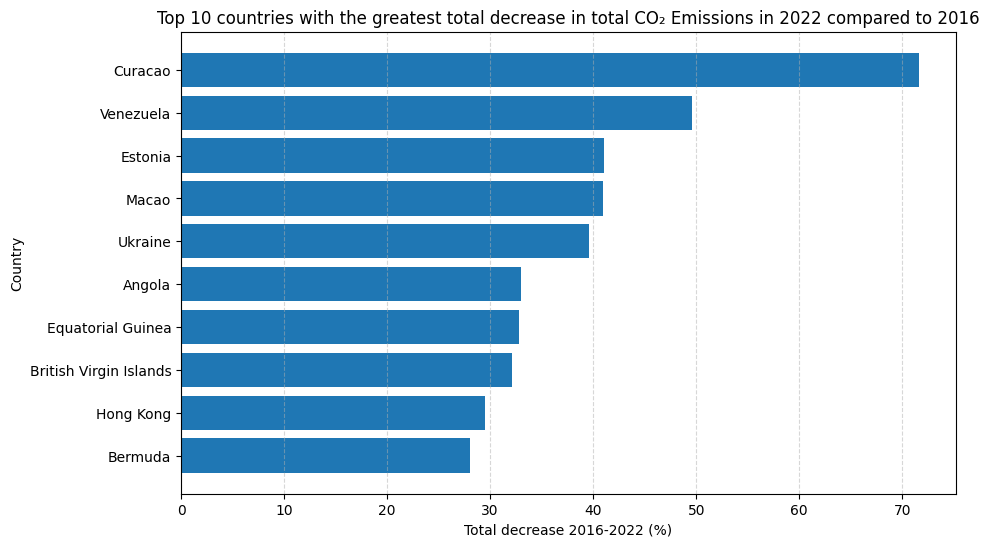

In [ ]:
# Plot bar graph
fig, ax = plt.subplots(figsize=(10, 6))
plt.barh(top10_emission_countries['Country'], top10_emission_countries['Difference (%)'])
plt.xlabel('Total decrease 2016-2022 (%)')
plt.ylabel('Country')
plt.title('Top 10 countries with the greatest total decrease in total CO₂ Emissions in 2022 compared to 2016')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.show()

The top 3 countries that decreased the total CO₂ emissions the most in the year 2022 compared to 2016 are Curacao, Venezuela and Estonia.

### Graph 4: Average percentage change over the years 2016-2022 in total
For this graph the CO₂ emissions of each year for each country have been compared to the CO₂ emission of the year before. The percentage change has been displayed in a table. Then, the average yearly change in CO₂ emission over the years 2016 until 2022 has been calculated. The graph shows the top 10 of countries where the average yearly decrease in CO₂ emission for each year over the years 2016-2022 was the highest.

In [ ]:
# Calculate the % change for each year compared to the previous year and put it in a new column
df_emissions_avg = df_emissions.copy()
df_emissions_avg['CO2 Emissions % Change'] = df_emissions_avg.groupby('Country')['Annual CO₂ emissions'].pct_change() * 100
df_emissions_avg

,Country,Year,Annual CO₂ emissions,CO2 Emissions % Change
0,Afghanistan,1949,14656.0,NaN
1,Afghanistan,1950,84272.0,475.000000
2,Afghanistan,1951,91600.0,8.695652
3,Afghanistan,1952,91600.0,0.000000
4,Afghanistan,1953,106256.0,16.000000
...,...,...,...,...
23882,Zimbabwe,2018,10714598.0,15.264906
23883,Zimbabwe,2019,9775428.0,-8.765331
23884,Zimbabwe,2020,7849639.0,-19.700304
23885,Zimbabwe,2021,8396158.0,6.962346


In [ ]:
# Filter df to keep only rows from 2015 and up
df_emissions_avg = df_emissions_avg[(df_emissions_avg['Year'] >= 2016)]

# Display the filtered dataframe
df_emissions_avg

,Country,Year,Annual CO₂ emissions,CO2 Emissions % Change
67,Afghanistan,2016,9067598.0,-7.389318
68,Afghanistan,2017,9867969.0,8.826715
69,Afghanistan,2018,10818048.0,9.627908
70,Afghanistan,2019,11081621.0,2.436419
71,Afghanistan,2020,11888066.0,7.277320
...,...,...,...,...
23882,Zimbabwe,2018,10714598.0,15.264906
23883,Zimbabwe,2019,9775428.0,-8.765331
23884,Zimbabwe,2020,7849639.0,-19.700304
23885,Zimbabwe,2021,8396158.0,6.962346


In [ ]:
# Calculate the average CO2 emissions % change for each country over years 2016-2022
df_emissions_avg_change = df_emissions_avg.groupby('Country')['CO2 Emissions % Change'].mean()

# Get the top 10 countries with the highest average CO2 emissions % reduction
emiss_avg_top10 = df_emissions_avg_change.nsmallest(10)

# Convert negative numbers to positive to make the chart better
emiss_avg_top10 = emiss_avg_top10.abs()
emiss_avg_top10

Country
Curacao                   16.946091
Montserrat                10.625779
Venezuela                  9.126796
Angola                     6.525142
Macao                      6.003925
Ukraine                    5.491588
British Virgin Islands     4.782639
Cuba                       4.706981
Estonia                    4.466991
Hong Kong                  4.294824
Name: CO2 Emissions % Change, dtype: float64

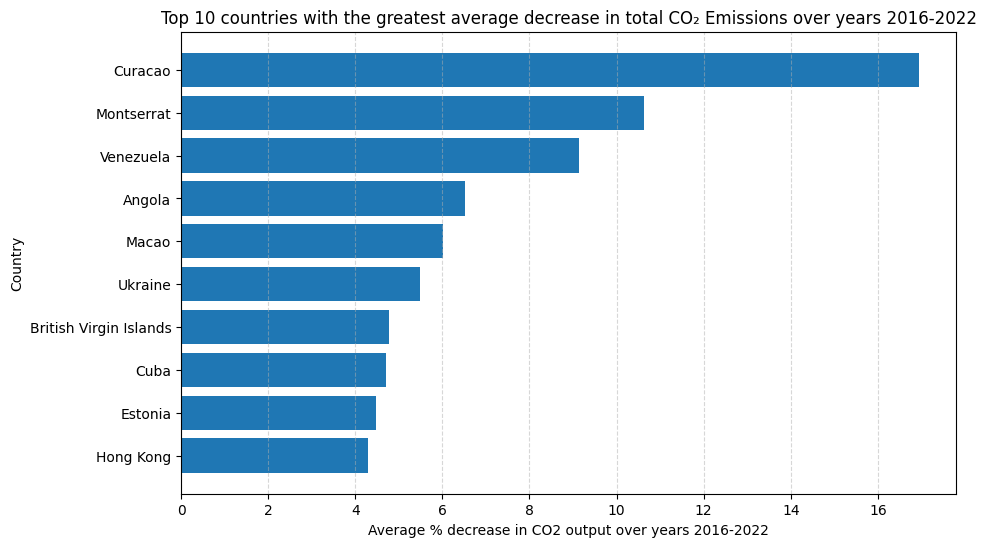

In [ ]:
# Reverse order
emiss_avg_top10 = emiss_avg_top10[::-1]

# Create graph
fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(emiss_avg_top10.index, emiss_avg_top10)
plt.xlabel('Average % decrease in CO2 output over years 2016-2022')
plt.ylabel('Country')
plt.title('Top 10 countries with the greatest average decrease in total CO₂ Emissions over years 2016-2022')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.show()

Despite fluctuations in yearly emissions, the top 3 countries that have consistently reduced their total CO₂ emissions on average when each year is compared to the previous year between the years 2016 and 2022, are Curacao, Montserrat and Venezuela.

# Conclusion

Of all four approaches to analyse this question, Curacao seems to be making the biggest strides in decreasing CO₂ output, as well as per capita as in total.
Also Macao and Venezuela are in the top 5 of each analysis, putting them also on top of the list of countries that are making the biggest strides in decreasing CO₂ output in total as well as per capita.
Other countries that show up in each top 10 and therefore making big strides are Estonia and British Virgin Islands.
Other countries that are worth mentioning in decreasing CO₂ output that show up in the top 10 of one or more graphs are Angola, Equatorial Guinea, Ukraine, Hong Kong, Bermuda, Montserrat, Cuba and Zimbabwe.